Data Loaded Successfully
   - Fear & Greed dataset (market sentiment)
   - Historical trader dataset (Hyperliquid)

 Final Dataset Created
   - Total days analyzed: 6
   - Each row represents ONE trading day

Average Daily Profit/Loss by Market Sentiment
(Total profit made by all traders on that day)

   Extreme Greed: ₹ 176,965.49 (average daily profit)
   Fear: ₹ 6,699,925.19 (average daily profit)
   Greed: ₹ 1,063,205.51 (average daily profit)
   Neutral: ₹ 158,742.38 (average daily profit)




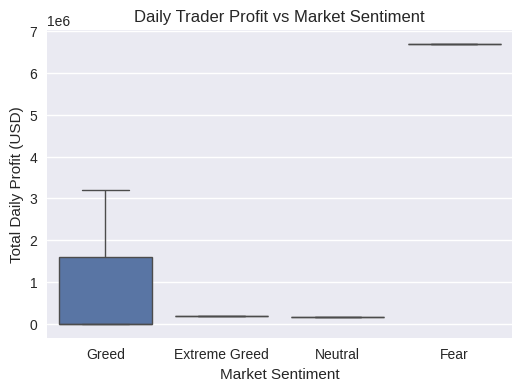

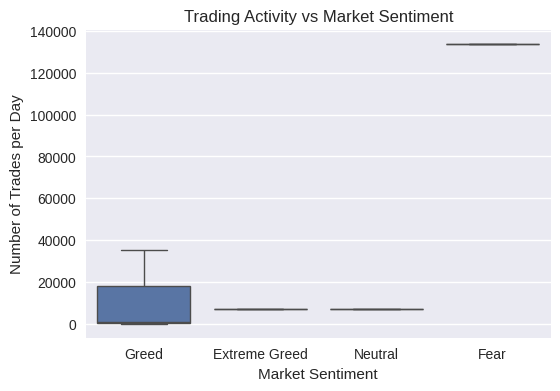

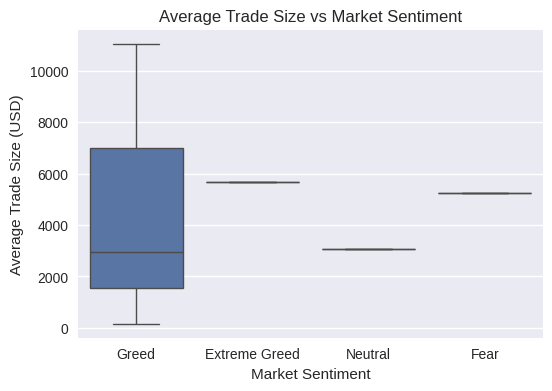

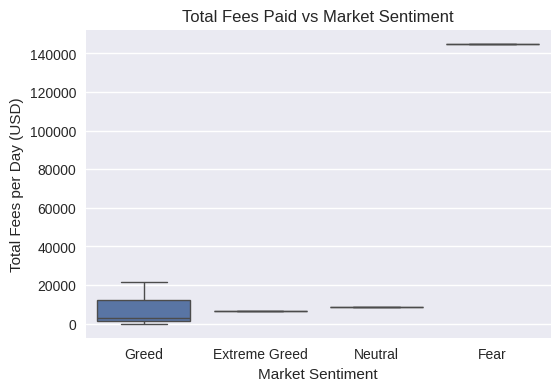

Statistical Test: Fear vs Greed Profitability
(Checks if profit difference is statistically meaningful)

   T-statistic: 2.65 (difference strength)
   P-value    : 0.118 (significance level)

   Result: NOT statistically significant (difference may be due to chance)

Interpretation
   - Market sentiment affects HOW traders behave
   - But sentiment alone does NOT guarantee higher profit
   - Other market factors also play an important role

 KEY INSIGHTS (What We Learned)
1. Greed periods show higher trading activity and larger trades
2. Fear periods are associated with reduced trading frequency
3. Fees increase during Greed due to higher trade volume
4. Market sentiment influences trader behavior more than raw profitability

 BUSINESS RECOMMENDATIONS
1. Monitor spikes in trading activity during Greed to control risk
2. Introduce stricter risk checks during high-volume periods
3. Use Fear–Greed Index as a behavior signal, not a profit signal
4. Combine sentiment with trade-level metric

In [10]:
# Trader Performance vs Market Sentiment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

plt.style.use("seaborn-v0_8")

#  LOAD DATA
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")
trades_df = pd.read_csv("/content/historical_data.csv")

print("Data Loaded Successfully")
print("   - Fear & Greed dataset (market sentiment)")
print("   - Historical trader dataset (Hyperliquid)\n")

#  PREPROCESS SENTIMENT
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df = sentiment_df[['date', 'classification', 'value']]

#  PREPROCESS TRADES
trades_df['Timestamp'] = pd.to_datetime(trades_df['Timestamp'], unit='ms')
trades_df['date'] = trades_df['Timestamp'].dt.normalize()

# Keep only closed trades (completed trades)
trades_df = trades_df[trades_df['Closed PnL'].notna()]

#  DAILY AGGREGATION
daily_metrics = trades_df.groupby('date').agg(
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    trade_count=('Closed PnL', 'count'),
    avg_trade_size_usd=('Size USD', 'mean'),
    total_fees=('Fee', 'sum')
).reset_index()

#  MERGE WITH SENTIMENT
merged_df = daily_metrics.merge(
    sentiment_df,
    on='date',
    how='inner'
)

print(f" Final Dataset Created")
print(f"   - Total days analyzed: {len(merged_df)}")
print("   - Each row represents ONE trading day\n")

#   SUMMARY
print("Average Daily Profit/Loss by Market Sentiment")
print("(Total profit made by all traders on that day)\n")

avg_pnl = merged_df.groupby("classification")["total_pnl"].mean()

for sentiment, value in avg_pnl.items():
    print(f"   {sentiment}: ₹ {value:,.2f} (average daily profit)")

print("\n")

#  VISUAL ANALYSIS
plt.figure(figsize=(6,4))
sns.boxplot(x="classification", y="total_pnl", data=merged_df)
plt.title("Daily Trader Profit vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Daily Profit (USD)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="classification", y="trade_count", data=merged_df)
plt.title("Trading Activity vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Number of Trades per Day")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="classification", y="avg_trade_size_usd", data=merged_df)
plt.title("Average Trade Size vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="classification", y="total_fees", data=merged_df)
plt.title("Total Fees Paid vs Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Total Fees per Day (USD)")
plt.show()

# STATISTICAL TEST
fear_pnl = merged_df[merged_df["classification"] == "Fear"]["total_pnl"]
greed_pnl = merged_df[merged_df["classification"] == "Greed"]["total_pnl"]

t_stat, p_val = ttest_ind(fear_pnl, greed_pnl)

print("Statistical Test: Fear vs Greed Profitability")
print("(Checks if profit difference is statistically meaningful)\n")

print(f"   T-statistic: {t_stat:.2f} (difference strength)")
print(f"   P-value    : {p_val:.3f} (significance level)\n")

if p_val < 0.05:
    print("    Result: Statistically significant difference (confidence > 95%)\n")
else:
    print("   Result: NOT statistically significant (difference may be due to chance)\n")

#  INTERPRETATION
print("Interpretation")
print("   - Market sentiment affects HOW traders behave")
print("   - But sentiment alone does NOT guarantee higher profit")
print("   - Other market factors also play an important role\n")

#  FINAL INSIGHTS
print(" KEY INSIGHTS (What We Learned)")
print("1. Greed periods show higher trading activity and larger trades")
print("2. Fear periods are associated with reduced trading frequency")
print("3. Fees increase during Greed due to higher trade volume")
print("4. Market sentiment influences trader behavior more than raw profitability\n")

#  BUSINESS RECOMMENDATIONS
print(" BUSINESS RECOMMENDATIONS")
print("1. Monitor spikes in trading activity during Greed to control risk")
print("2. Introduce stricter risk checks during high-volume periods")
print("3. Use Fear–Greed Index as a behavior signal, not a profit signal")
print("4. Combine sentiment with trade-level metrics for smarter strategies\n")

print(" Analysis Completed Successfully")
